In [33]:
import random
from itertools import permutations
import matplotlib.pyplot as plt
import time
%matplotlib inline


In [37]:
City = complex
def X(city): return city.real
def Y(city): return city.imag

def distance(a,b): return abs(b-a)

def Cities(n, w=900, h=600, seed=1):
    # creo n punti a caso sul piano.
    return frozenset(City(random.randrange(w),random.randrange(h)) for _ in range(n))

Tour = list

def first(s):
    return next(iter(s))

def alltours(cities):
    start = first(cities)
    return [[start] + Tour(r) for r in permutations(cities - {start})]

def tour_length(t):
    return sum(distance(t[i-1],t[i]) for i in range(len(t)))

def minimo_tours(x) -> list:
    return min(x,key=tour_length)

def bruteforce(c): 
    return minimo_tours(alltours(c))
 

In [3]:
c = Cities(5,seed=10)
print(c)

frozenset({(795+119j), (302+404j), (548+464j), (209+34j), (950+406j)})


In [27]:
l = alltours(c)
sol = min(l,key=tour_length)
print(sol)
print(bruteforce(c))

[(795+119j), (950+406j), (548+464j), (302+404j), (209+34j)]
[(795+119j), (950+406j), (548+464j), (302+404j), (209+34j)]


In [38]:

def plot_tour(tour):
    "Plot the cities as circles and the tour as lines between them. Start city is red square."
    start = tour[0]
    plot_lines(list(tour) + [start])
    plot_lines([start], 'rs') # Mark the start city with a red square
    
def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    plt.plot(list(map(X, points)), list(map(Y, points)), style)
    plt.axis('scaled'); plt.axis('off')    
    
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    t0 = time.perf_counter()
    tour = algorithm(cities)
    t1 = time.perf_counter()
    assert valid_tour(tour, cities)
    plot_tour(tour); 
    plt.show()
    print(f"{len(tour)} city tour with length {tour_length(tour):.1f} in {:.3f} secs for {t1 - t0}")
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)
    
    

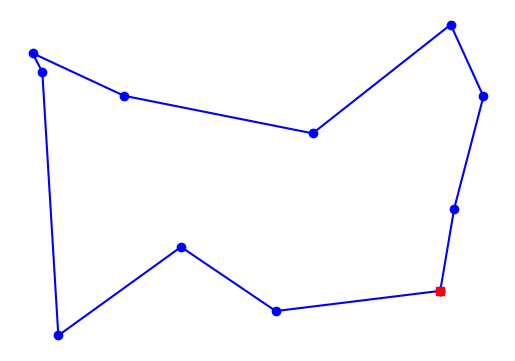

11 city tour with length 2100.3 in 5.879 secs for bruteforce


In [48]:
plot_tsp(bruteforce,Cities(11))

In [ ]:
NP-completi
